# 데이터 정의

|  x1    |   x2    |  y  |
|:-------:|:-------:|:---:|
| 0.8147  | 0.8576  |  1  |
| 0.9058  | 0.9706  |  1  |
| 0.1270  | 0.2572  |  0  |
| 0.9134  | 0.8854  |  1  |
| 0.6324  | 0.8003  |  0  |
| 0.0975  | 0.1419  |  0  |
| 0.2785  | 0.4218  |  0  |
| 0.5469  | 0.9157  |  1  |
| 0.9575  | 0.7922  |  0  |
| 0.9649  | 0.9595  |  1  |


In [10]:
# 데이터 정의
x1 = [
    0.8147, 0.9085, 0.127, 0.9134, 0.6324, 0.0975, 0.2785, 0.5469, 0.9575, 0.9649
]
x2 = [
    0.8576, 0.9706, 0.2572, 0.8854, 0.8003, 0.1419, 0.4218, 0.9157, 0.7922, 0.9595
]

y = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1]

## [Question]<br>
사실 Decision Boundary가 정확히 그어지기 때문에 MLP가 필요한가? 굳이 연산을 한번 더 해서 Representation Space를 바꾸어 주어야할 필요가 있을까?

## [Answer]<br>
YES! MLP는 선형 경계로 구분할 수 없는 데이터. 가령, XOR문제나 곡선 형태의 경계를 가져야 하는 데이터들에 대해서 representation을 바꾸어 Decistion Boundary를 정확히 그려낼 수 있도록 바꾸는 과정이 hidden layer를 추가함으로써 진행된다.

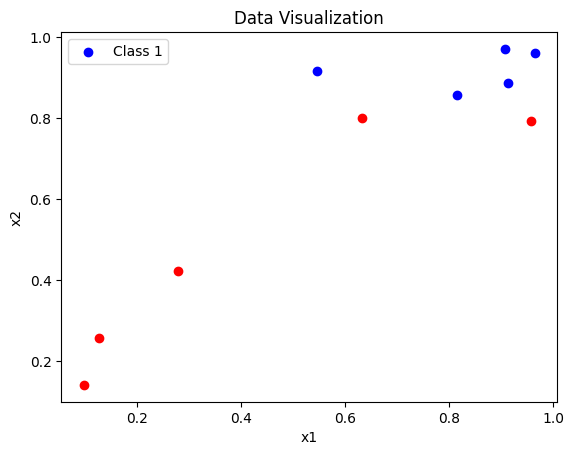

In [11]:
import matplotlib.pyplot as plt

for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(x1[i], x2[i], color='blue', label='Class 1' if i == 0 else "")
    else:
        plt.scatter(x1[i], x2[i], color='red', label='Class 0' if i == 0 else "")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Data Visualization")
plt.show()


In [34]:
import numpy as np

# 데이터 정의
x1 = [
    0.8147, 0.9085, 0.127, 0.9134, 0.6324, 0.0975, 0.2785, 0.5469, 0.9575, 0.9649
]
x2 = [
    0.8576, 0.9706, 0.2572, 0.8854, 0.8003, 0.1419, 0.4218, 0.9157, 0.7922, 0.9595
]
y = [1, 1, 0, 1, 0, 0, 0, 1, 0, 1]

# 데이터 준비
X = np.column_stack((x1, x2))  # (10x2 행렬)
y = np.array(y).reshape(-1, 1)  # (10x1 벡터)
m, n = X.shape  # 샘플 수, 피처 수

# 가중치 초기화
hidden_layer_size = 1  # 은닉층 노드 개수
weights_input_hidden = np.random.rand(n, hidden_layer_size) * 0.01  # 입력 -> 은닉층
weights_hidden_output = np.random.rand(hidden_layer_size, 1) * 0.01  # 은닉층 -> 출력층
bias_hidden = np.zeros((1, hidden_layer_size))  # 은닉층 바이어스
bias_output = np.zeros((1, 1))  # 출력층 바이어스

# Sigmoid 함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid의 미분
def sigmoid_derivative(z):
    return z * (1 - z)

# MLP 학습 함수
def mlp(X, y, lr, epochs):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

    for epoch in range(epochs):
        # 순전파
        hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden  # 은닉층 입력
        hidden_layer_output = sigmoid(hidden_layer_input)  # 은닉층 출력

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output  # 출력층 입력
        y_hat = sigmoid(output_layer_input)  # 출력층 출력

        # 역전파
        # 출력층 손실 기울기
        output_error = y - y_hat  # 출력 오차
        output_delta = output_error * sigmoid_derivative(y_hat)

        # 은닉층 손실 기울기
        hidden_error = np.dot(output_delta, weights_hidden_output.T)  # 은닉층 오차
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # 가중치 및 바이어스 업데이트
        weights_hidden_output += lr * np.dot(hidden_layer_output.T, output_delta)
        weights_input_hidden += lr * np.dot(X.T, hidden_delta)
        bias_output += lr * np.sum(output_delta, axis=0, keepdims=True)
        bias_hidden += lr * np.sum(hidden_delta, axis=0, keepdims=True)

        # 100번째 에포크마다 손실 출력
        if epoch % 100 == 0:
            loss = np.mean(output_error**2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

# 모델 훈련
mlp(X, y, lr=0.9, epochs=1200)

# 최종 결과 출력
hidden_layer_output = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
y_hat = sigmoid(np.dot(hidden_layer_output, weights_hidden_output) + bias_output)
y_pred = (y_hat >= 0.5).astype(int)

print("\nPredictions:", y_pred.ravel())
print("Actual:", y.ravel())

# 정확도 계산
accuracy = np.mean(y_pred == y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.1627
Epoch 200, Loss: 0.0987
Epoch 300, Loss: 0.1048
Epoch 400, Loss: 0.1512
Epoch 500, Loss: 0.0984
Epoch 600, Loss: 0.0679
Epoch 700, Loss: 0.0294
Epoch 800, Loss: 0.0762
Epoch 900, Loss: 0.0841
Epoch 1000, Loss: 0.0676
Epoch 1100, Loss: 0.0493

Predictions: [1 1 0 1 0 0 0 1 0 1]
Actual: [1 1 0 1 0 0 0 1 0 1]

Accuracy: 100.00%



Confusion Matrix:
[[5 0]
 [0 5]]


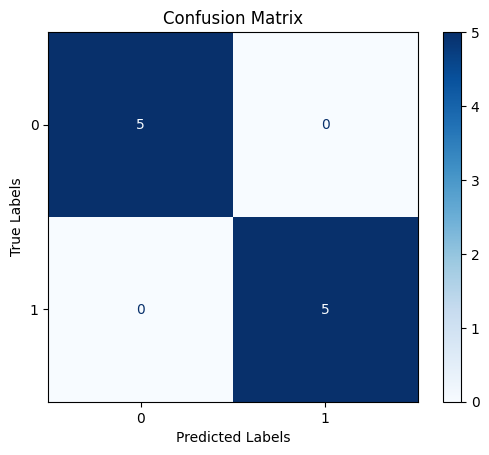

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 계산
cm = confusion_matrix(y, y_pred)

# Confusion Matrix 출력
print("\nConfusion Matrix:")
print(cm)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
disp.ax_.grid(False)  # 불필요한 그리드 제거
plt.show()
